In [1]:
using Revise
includet("diatomic.jl")

using .diatomic_jl.MoleculeTypes
using .diatomic_jl


In [68]:
MoleculeOperator = Molecule.generateMolecule(Rb87Cs133, 2)
beams = Dict("B" =>Hamiltonian.OpticalBeam([0.0, 1.0, 0.0], [0, 1.0, 0.0]))
Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])

In [69]:
IntensityScan = solve.scanIntensity(Hmol_I, 154.5e-4, 0.0, [0:0.1:15...]*1e7);

In [70]:
Q0 =  State([0.0, 0.0, 1.5, 3.5, 1.5, 1.5], Hmol_I)
Q1 =  State([0.0, 0.0, 3.5, 3.5, 0.5, 1.5], Hmol_I)
Q0_qn  = calculate.findMaxOverlap(Q0, IntensityScan[1].vec)
Q1_qn = calculate.findMaxOverlap(Q1, IntensityScan[1].vec)
#println(calculate.KetName(State(IntensityScan[1].vec[:, Q0_qn]), Hmol_I))

5

In [71]:
diabaticOrder = calculate.diabaticOrder(Hmol_I, IntensityScan, rev = false);

In [72]:
energyDiff = [sol_i.val[Q1_qn] for sol_i in diabaticOrder] .-[sol_i.val[Q0_qn] for sol_i in diabaticOrder]

151-element Vector{Float64}:
 76985.01484897692
 76984.8286318857
 76984.64243396092
 76984.45622912934
 76984.27002153615
 76984.08381210634
 76983.89760793891
 76983.71140046173
 76983.52519296447
 76983.33898351161
     ⋮
 76958.57079108013
 76958.38454721472
 76958.19830125012
 76958.01204866543
 76957.82580732438
 76957.63955369894
 76957.45330844051
 76957.26706271176
 76957.08081488241

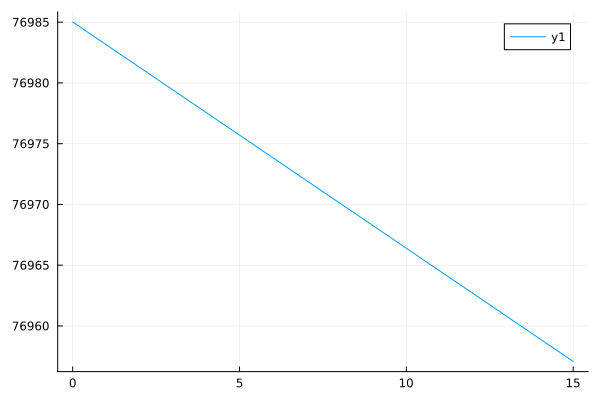

In [73]:
using Plots
Int_scan = [sol_i.Intensity[1] for sol_i in diabaticOrder].*1e-7
plot(Int_scan, energyDiff)

In [76]:

linearPol(φ) = [0, sin(φ), cos(φ)]
angle = [0, 55.5, 90]*pi/180#-pi/2:0.01:pi/2

energyScan = []
for ang in angle

    MoleculeOperator = Molecule.generateMolecule(Rb87Cs133, 2)
    beams = Dict("B" =>Hamiltonian.OpticalBeam([1.0, 0.0, 0.0],linearPol(ang)))
    Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])
    IntensityScan = solve.scanIntensity(Hmol_I, 154.5e-4, 0.0, [0:0.1:15...]*1e7);
    Q0 =  State([0.0, 0.0, 1.5, 3.5, 1.5, 1.5], Hmol_I)
    Q1 =  State([0.0, 0.0, 3.5, 3.5, 0.5, 1.5], Hmol_I)
    Q0_qn  = calculate.findMaxOverlap(Q0, IntensityScan[1].vec)
    Q1_qn = calculate.findMaxOverlap(Q1, IntensityScan[1].vec)
    diabaticOrder = calculate.diabaticOrder(Hmol_I, IntensityScan, rev = false);
    push!(energyScan, [sol_i.val[Q1_qn] for sol_i in diabaticOrder] .-[sol_i.val[Q0_qn] for sol_i in diabaticOrder])
end

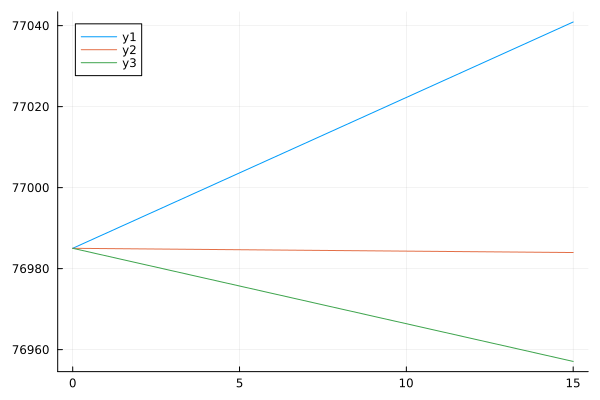

In [77]:
Int_scan = [sol_i.Intensity[1] for sol_i in diabaticOrder].*1e-7
plot(Int_scan, energyScan[1])
plot!(Int_scan, energyScan[2])
plot!(Int_scan, energyScan[3])

918.9518691003323

In [ ]:
IntensityScan = solve.scanIntensity(Hmol_I, 151.50e-4, 420e2, [0:0.1:15...]*1e7);

In [ ]:
plotting.plotIntensityScan(Hmol_I, IntensityScan, N = [1])